# Hypothesis Testing in Python

In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<hr>

## Chapter 1: Hypothesis Testing Fundamentals

### Hypothesis tests and z-scores

***A/B testing lets you compare scenarios to see which best achieves some goal.***

In [30]:
stack_overflow = pd.read_feather("databases/stack_overflow.feather")
stack_overflow.head(5)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


**A hypothesis:**

>The mean annual compensation of the population of the data scientists is $110,000

Let's examine the point estimate(sample statistic)

In [31]:
mean_comp_samp = stack_overflow["converted_comp"].mean()
np.round(mean_comp_samp, 2)

119574.72

The result is different from our hypothesis, but is it meaningfully different? To answer we have to generate a bootstrap distribution of sample means

In [32]:
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        np.mean(
            stack_overflow.sample(frac=1, replace=True)["converted_comp"]
        )
    )

KeyboardInterrupt: 

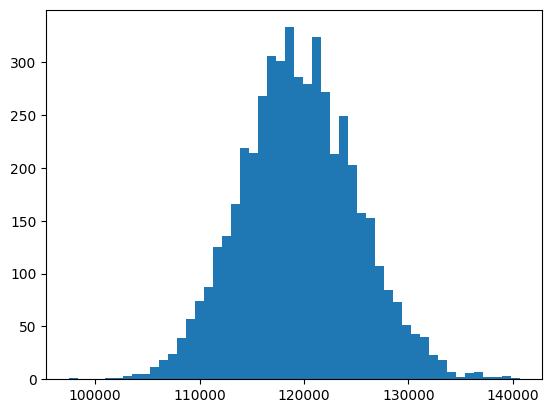

In [ ]:
plt.hist(so_boot_distn, bins=50)
plt.show()

In [ ]:
std_error = np.std(so_boot_distn, ddof=1)

Standartizing the values: substract the mean and divide by the standard deviation

`z = (sample stat - hypoth. param. value) / standard error`

In [ ]:
mean_comp_samp = stack_overflow["converted_comp"].mean()
mean_comp_hyp = 110000
std_error = np.std(so_boot_distn, ddof=1)

z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.7242078867925812

Determening whether 1.7 is a big or a small number is the goal of this course

### p-value

>Evidence that a greater proportion of data scientists starting programming as children

***A hypothesis is a statement about an unknown population parameter***

***A hypothesis test is a test of two competing hypotheses:***
- The null hypothesis (HO) is the existing idea
- The alternative hypothesis (HA) is the new "challenger" idea of the researcher

- H0: The proportion of data scientists starting programming as children is 35% (we got this info from another report)
- HA: The proportion of data scientists starting programming as children is greater than 35%

- Either HA or HO is true (not both)
- Initially, H0 is assumed to be true
- The test ends in either "reject H0" or "fail to reject H0"
- If the evidence from the sample is "significant" that HA is true, reject H0, else choose H0

**Hypothesis tests check if the sample statistics lie in the tails of the null distribution**

<table>
    <thead>
        <td><b>Test</b></td>
        <td><b>Tails</b></td>
    </thead>
    <tbody>
        <tr>
            <td>alternative different from null</td>
            <td>two-tailed</td>
        </tr>
        <tr>
            <td>alternative greater than null</td>
            <td>right-tailed</td>
        </tr>
        <tr>
            <td>alternative less than null</td>
            <td>left-tailed</td>
        </tr>
    </tbody>
</table>

In our case we need the right-tailes test since we eare looking for extreme values in the right tail (HA: The proportion of data scientists starting programming as children is **greater than** 35%)

***p-values***: the probability of obtaining a result, assuming the null hypothesis is true

- Large p-value, large support for H0 (statistic likely **not** in the rail of the null distribution)
- Small p-value, strong evidence against H0 (statistic likely **in** the tail of the null distribution)
- p-value is always between 0 and 1

In [ ]:
# 1 - Sample mean
prop_child_samp = (stack_overflow["age_first_code_cut"] == "child").mean()
# 2 - Hypothesis
prop_child_hyp = 0.35

# 3 - Std from bootstrap
first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
            (stack_overflow.sample(frac=1, replace=True)["age_first_code_cut"] == "child").mean()
        )
std_error = np.std(first_code_boot_distn, ddof=1)   

# 4 - z-score
z_score = (prop_child_samp - prop_child_hyp) / std_error
z_score

4.147206574003721

- `norm.cdf()` is normal CDF from scipy.stats
- Left-tailed test use `norm.cdf()`
- Right-tailed test use `1-norm.cdf()`

In [ ]:
from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)

1.682781911982456e-05

We get the low p value, so as i understand we can reject H0 hypothesis

### Statistical significance

What is the cutoff point between small p-value and large p-value?

- the cutoff point is known as the significance level and is denoted as **alpha**
- common values of **alpha** are 0.05, 0.1, 0.2, 0.01

- ***if p-value < alpha reject H0, else fail to reject H0***
- **alpha** should be set prior to the hypothesis test

**Calculating p-value:**

In [ ]:
alpha = 0.05
prop_child_samp = (stack_overflow["age_first_code_cut"] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) /std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value

1.682781911982456e-05

In [ ]:
p_value < alpha

True

**Reject H0 in favor of HA**

For a significante level of alpha, it is common to choose a confidence interval of 1 - alpha (alpha = 0.05 => interval = 0.95)

In [ ]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))

(0.3724015922158337, 0.41088014153029634)


***Types of errors:***

<table>
    <thead>
        <td></td>
        <td><b>actual H0</b></td>
        <td><b>actual HA</b></td>
    </thead>
    <tbody>
        <tr>
            <td><b>chosen H0</b></td>
            <td>correct</td>
            <td>false negative</td>
        </tr>
        <tr>
            <td><b>chosen HA</b></td>
            <td>false positive</td>
            <td>correct</td>
        </tr>
    </tbody>
</table>

***False positives are Type 1 errors and false negatives are Type 2 errors***

When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

<hr>

## Chapter 2: Two-Sample and ANOVA Tests

### Performing t-tests

- Compare sample statistics across groups of a variable
- `converted_comp` is a numerical variable
- `age_first_code_cut` is a categorical variable ewith levels (`child` and `adult`)
- Are users who first programmed as a child compensated higher than those that started as adults?

**Hypotheses**

- H0: The mean compensation is **the same** for those that coded first as a child and those that coded first as an adult

- HA: The mean compensation is **greater** for those that coded first as a child compared to those that coded first as an adult

Calculating groupwise summary statistics

In [ ]:
xbar_adult, xbar_child = stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()

We have to understand whether this result is statistically significant

`t = (difference in sample stats - difference in population parameters) / standard error`

`SE = np.sqrt(s^2(child) / n(child) + s^2(adult) / n(adult))`

If we assume the H0 hypotheses is true, then difference in population shall be 0 and we can avoid calculating this part

In [ ]:
s_adult, s_child = stack_overflow.groupby("age_first_code_cut")["converted_comp"].std()

In [ ]:
n_adult, n_child = stack_overflow.groupby("age_first_code_cut")["converted_comp"].count()

In [ ]:
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator/denominator
t_stat

1.8699313316221844

Can't draw any conclusions yet

**From task 1**

When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.

### Calculating p-values from t-statistics

- t statistic follows a t-distribution
- Have a parameter named **degrees of freedom**, or **df**
- Looks like normal distributions, with fatter tails
- larger degrees of freedom -> t-distribution gets closer to the normal distribution
- Normal distribution is the t-distribution with infinite df
- Degrees of freedom: maximum number of logically idependent values in the data sample

z-statistic: needed when using **one** sample statistic to estimate a population parameter

t-statistic: needed when using **multiple** sample statistics to estimate a population parameter

In [ ]:
degrees_of_freedom = n_child + n_adult - 2
degrees_of_freedom

2259

In [ ]:
from scipy.stats import t
1 - t.cdf(t_stat, df=degrees_of_freedom)

0.030811302165157595

We reject hypotheses H0

### Paired t-tests

In [ ]:
sample_data = pd.read_feather("databases/repub_votes_potus_08_12.feather")

**Question:**

>Was the percentage of Republican candidate votes lower in 2008 than 2012

H0: population parameters are the same in each year group

HA: parameter in 2008 is lower than in 2012

- Let's set alpha = 0.05
- Data is paired -> each voter percentage refers to the same county (want to capture voting patterns in model)

In [ ]:
sample_data["diff"] = sample_data["repub_percent_08"] - sample_data["repub_percent_12"]

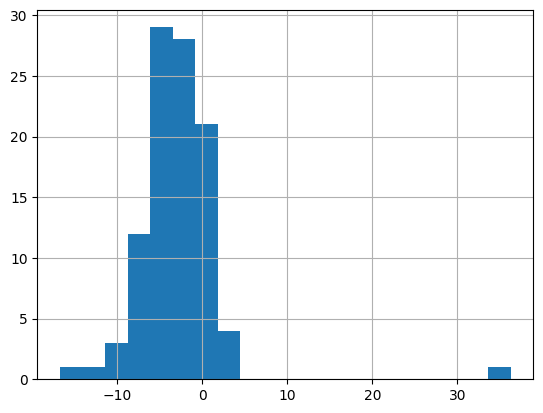

In [ ]:
sample_data["diff"].hist(bins=20)
plt.show()

In [ ]:
xbar_diff = sample_data["diff"].mean()
xbar_diff

-2.877109041242944

New hypotheses:
- H0: diff population is zero
- HA: diff population is lower than zero

We have one statistics so the number of degrees of freedom is the number of pairs - 1

In [ ]:
n_diff = len(sample_data)
n_diff

100

In [33]:
s_diff = sample_data["diff"].std()
s_diff

5.136737887231852

In [35]:
t_stat = (xbar_diff - 0) / np.sqrt(s_diff ** 2 / n_diff)
t_stat

-5.601043121928489

In [38]:
degrees_of_freedom = n_diff - 1
degrees_of_freedom

99

In [40]:
from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
p_value

9.572537285272411e-08

In [41]:
p_value < alpha

True

***Reject H0***

**Testing differences between two means using ttest()**

In [43]:
import pingouin
pingouin.ttest(x=sample_data["diff"],
               y=0,
               alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


**ttest() with paired = True**

In [45]:
pingouin.ttest(x=sample_data["repub_percent_08"],
                y=sample_data["repub_percent_12"],
                paired=True,
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


If we compare **same group** of people in different time we use paired t-test, if we compare **various groups (not connected)** - we use non paired t-test

### ANOVA tests

What if there are more than two groups?

Is mean annual compensation different for different levels of job satisfaction?

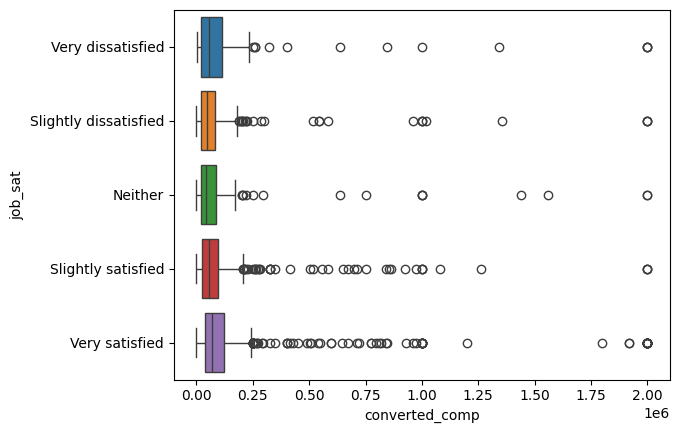

In [47]:
sns.boxplot(x="converted_comp",
            y="job_sat",
            data=stack_overflow,
            hue="job_sat")
plt.show()

ANOVA - a test for differences between groups

In [48]:
alpha = 0.2

pingouin.anova(data=stack_overflow,
               dv="converted_comp",
               between="job_sat")

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


p-unc < alpha

That means that at least two categories have significantly different compensation

In [54]:
pingouin.pairwise_tests(data=stack_overflow,
               dv="converted_comp",
               between="job_sat",
               padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


We should look on the p-values -> three of them are less than our alpha (0.2)

<hr>

## Chapter 3: Proportion Tests

<hr>

## Chapter 4: Non-Parametric Tests